In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

import numpy as np
from matplotlib import pyplot as plt

# read data
import numpy as np
with open('classes.txt') as file:
    s=file.read()
    names=s.split('\n')
for i in range(len(names)):
    names[i]=names[i][7:].replace("+"," ")
names.pop()
# print(names)
    
with open('predicate-matrix-continuous.txt') as file:
    s=file.read()
    lines=s.split('\n')
    data=[]
    for k in range(len(lines)):
        nums=lines[k].split(' ')
        dataline=[]
        for i in range(1,len(nums)):
            try:
                x=float(nums[i])
                can=True
            except:
                can=False
            if can:
                dataline.append(x)
        if len(dataline)==85:
            data.append(dataline)
data=np.array(data)
print(data.shape)

(50, 85)


cov matrix shape= (85, 85)


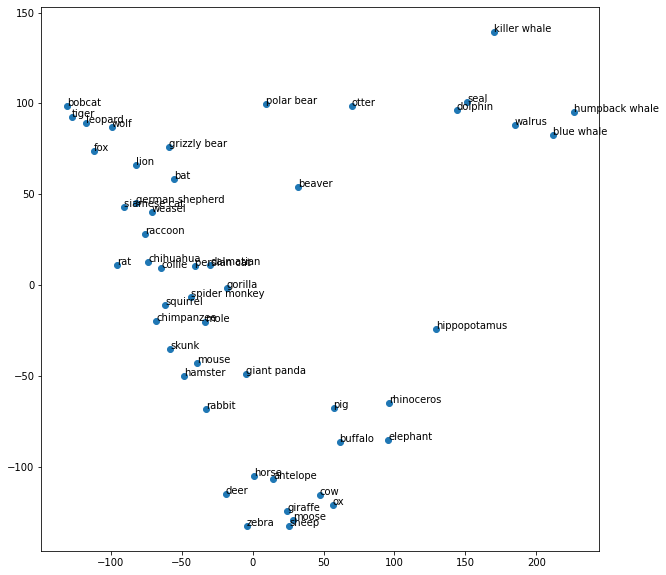

In [107]:
# PCA
# 1-covariance matrix
covmatr=np.cov(data.T) # should be the covariance matrix between coordinator
print("cov matrix shape=",covmatr.shape)

# 2-eigenvalue and eigenvector; means
from numpy import linalg as LA
value,vector=LA.eig(covmatr)
# ! The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
# print(np.matrix(vectors).T @ np.matrix(covmatr) @ np.matrix(vectors))
# or print(vectors.T @ covmatr @ vectors)
# covmatr=vectors * (w) * vector.T
# print(covmatr @ vectors[:,0])
means=sum(data)/len(data)
# print(means)

# 3-PCA; select the largest component(eigenvalue) and make projection
# print(values) # check order
u=vector[:,:2]
pca= (data-means) @ u
X,Y=pca[:,0],pca[:,1]
plt.scatter(X,Y)
for i in range(len(X)):
    plt.annotate(names[i], (X[i], Y[i]))

D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


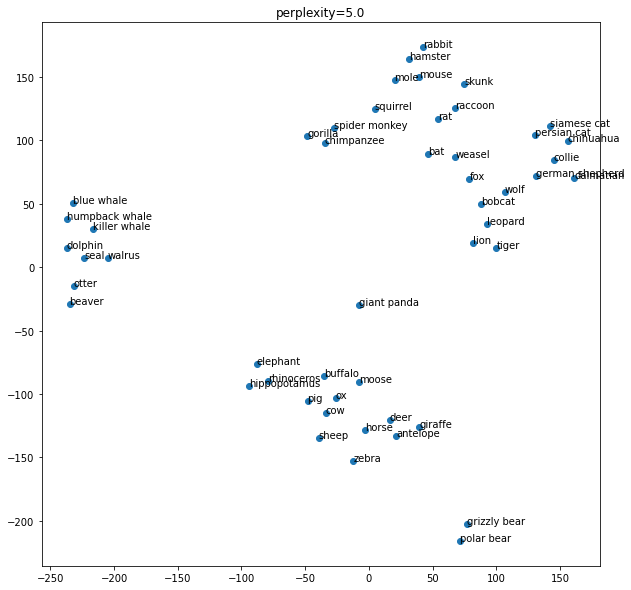

D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


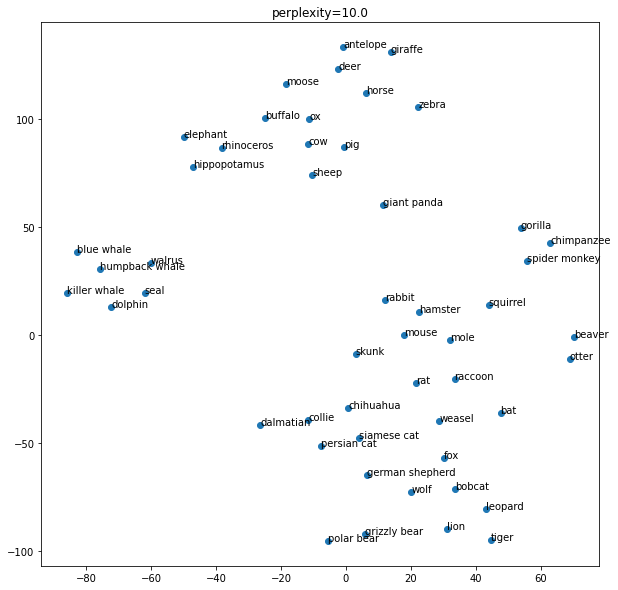

D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


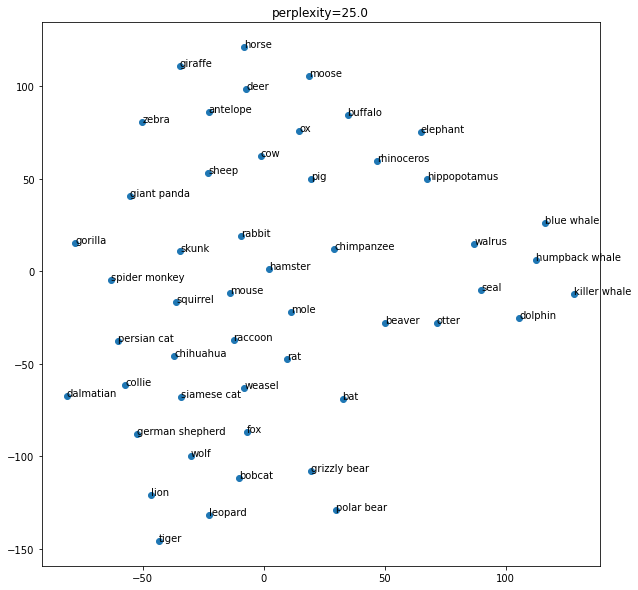

D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\Program Files\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


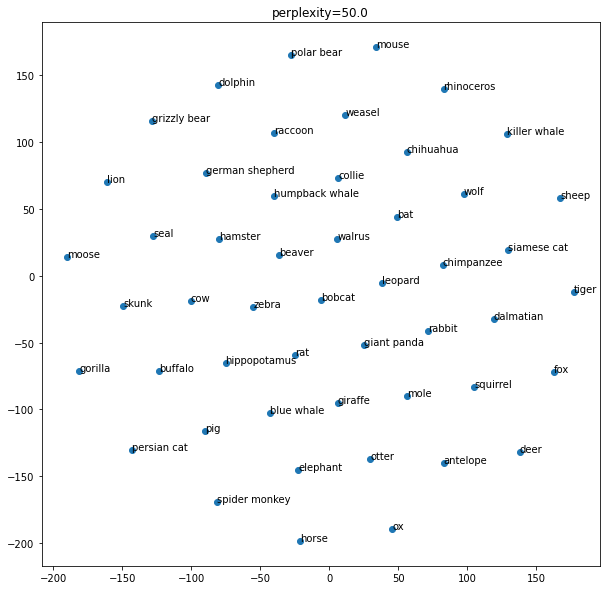

In [109]:
from sklearn.manifold import TSNE
perp=[5.,10.,25.,50.]
tsne=[]
for i in range(len(perp)):
    Z=TSNE(n_components=2, perplexity=perp[i]).fit_transform(data)
    tsne.append(Z)
    X,Y=Z[:,0],Z[:,1]
    plt.scatter(X,Y)
    plt.title("perplexity="+str(perp[i]))
    for i in range(len(X)):
        plt.annotate(names[i], (X[i], Y[i]))
    plt.show()


In [110]:
import math
def euclid(a,b):
    s=0
    for i in range(len(a)):
        s += (a[i]-b[i]) ** 2
    return math.sqrt(s)

def distortion(z):
    """
    compute distortion Dij, with mean
    """
    n=len(z)
    D=[[0 for j in range(n)] for i in range(n)]
    s=0
    for i in range(n):
        for j in range(n):
            D[i][j]=euclid(z[i],z[j])
            s += D[i][j]
    s /= (n**2)
    return s,D

def aver_dt(M,D,Mshap,Dshap):
    c = M/Mshap
    s = 0
    n=len(D)
    for i in range(n):
        for j in range(n):
            if i != j:
                ratio=D[i][j]/(c*Dshap[i][j])
                s += max(ratio, 1.0/ratio)
            else:
    s /= (n**2-n)
    return s

covmatr=np.cov(data.T)
value,vector=LA.eig(covmatr)
means=sum(data)/len(data)
# print(means)

M,D=distortion(data)
Mshap,Dshap=distortion(pca)
averdis=aver_dt(M,D,Mshap,Dshap)
print("average distortion for PCA ==>",averdis)
for i in range(len(perp)):
    Mshap,Dshap=distortion(tsne[i])
    averdis=aver_dt(M,D,Mshap,Dshap)
    print("average distortion for TSNE(perplexity=",perp[i],") ==>",averdis)

average distortion for PCA ==> 1.8313495400958346
average distortion for TSNE(perplexity= 5.0 ) ==> 1.838582270663457
average distortion for TSNE(perplexity= 10.0 ) ==> 1.6319777833440978
average distortion for TSNE(perplexity= 25.0 ) ==> 1.4712226995150912
average distortion for TSNE(perplexity= 50.0 ) ==> 1.6834961922780085


D:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
